In [1]:
import os
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize

In [2]:
train_path = r'D:\Datasets\Twitter\twitter_training.csv'
test_path = r"D:\Datasets\Twitter\twitter_validation.csv"
df = pd.read_csv(train_path, names = ['id','company','sentiment','review'])
test_df = pd.read_csv(test_path, names= ['id','company','sentiment','review'])

In [3]:
def preprocess(text):
    if isinstance(text, str):
        stop_words = set(stopwords.words('english'))
        text = text.translate(str.maketrans('','',string.punctuation))
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    else:
        return ' '

In [4]:
df['review'] = df['review'].apply(preprocess)
test_df['review'] = test_df['review'].apply(preprocess)

<Axes: xlabel='sentiment', ylabel='count'>

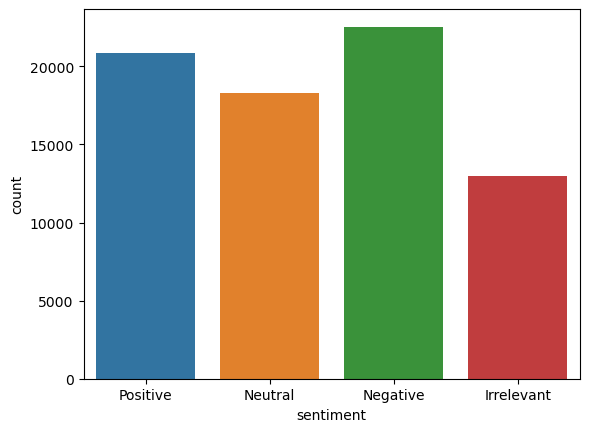

In [5]:
sns.countplot(df, x = 'sentiment')

<Axes: xlabel='sentiment', ylabel='count'>

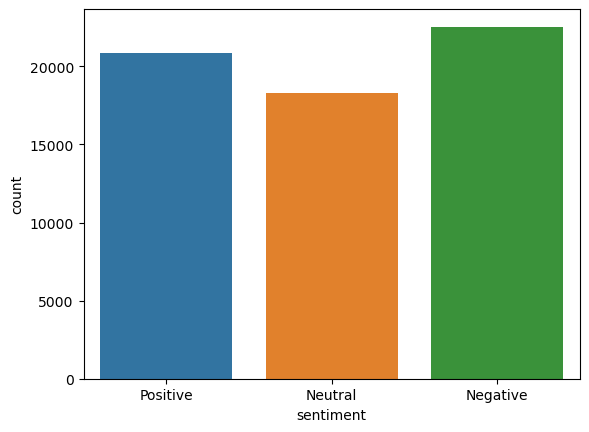

In [6]:
df = df[df['sentiment'] != 'Irrelevant']
test_df = test_df[test_df['sentiment'] != 'Irrelevant']
sns.countplot(df, x = 'sentiment')

In [7]:
vectorizer = TfidfVectorizer()
x_train = df['review']
x_test = test_df['review']
y_train = df['sentiment']
y_test = test_df['sentiment']

In [8]:
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [9]:
model = SVC(kernel = 'linear')
model.fit(x_train_vectorized, y_train)

SVC(kernel='linear')

In [10]:
rbf_model = SVC(kernel = 'rbf')
rbf_model.fit(x_train_vectorized, y_train)

SVC()

In [11]:
y_pred = model.predict(x_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [12]:
rbf_y_pred = rbf_model.predict(x_test_vectorized)
rbf_accuracy = accuracy_score(y_test, rbf_y_pred)
rbf_report = classification_report(y_test, rbf_y_pred)

In [13]:
print(f"Accuracy: {accuracy: .4f}")
print(f"Classificatio Report: \n {report}")

Accuracy:  0.9601
Classificatio Report: 
               precision    recall  f1-score   support

    Negative       0.95      0.97      0.96       266
     Neutral       0.97      0.95      0.96       285
    Positive       0.96      0.97      0.96       277

    accuracy                           0.96       828
   macro avg       0.96      0.96      0.96       828
weighted avg       0.96      0.96      0.96       828



In [14]:
print(f"Accuracy: {rbf_accuracy: .4f}")
print(f"Classificatio Report: \n {rbf_report}")

Accuracy:  0.9843
Classificatio Report: 
               precision    recall  f1-score   support

    Negative       0.99      0.98      0.99       266
     Neutral       0.98      0.98      0.98       285
    Positive       0.98      0.99      0.98       277

    accuracy                           0.98       828
   macro avg       0.98      0.98      0.98       828
weighted avg       0.98      0.98      0.98       828



In [34]:
review = ["You are a okay person", "I dont like you", 'I purchased 26 apples', 'Its a good movie', 'good', 'bad', 'okay', 'It was a good trip']

In [35]:
df = pd.DataFrame({'review':review})

In [36]:
df.review = df.review.apply(preprocess)

In [37]:
test = vectorizer.transform(df.review)

In [38]:
predictions = model.predict(test)
rbf_predictions = rbf_model.predict(test)

In [39]:
results = pd.DataFrame({'review': review, 'predictions': predictions})
results

,review,predictions
0,You are a okay person,Neutral
1,I dont like you,Negative
2,I purchased 26 apples,Neutral
3,Its a good movie,Positive
4,good,Positive
5,bad,Negative
6,okay,Neutral
7,It was a good trip,Neutral
